# SVM & Naïve Bayes — Assignment Solutions





## Theoretical Questions (brief answers)

**What is a Support Vector Machine (SVM)?**  
A Support Vector Machine is a supervised learning algorithm used for classification and regression. It finds the hyperplane that best separates classes by maximizing the margin between support vectors (closest points of each class).

**Difference between Hard Margin and Soft Margin SVM**  
- *Hard margin*: requires perfect separation of classes; no misclassification allowed (only possible if data is linearly separable).  
- *Soft margin*: allows some misclassifications controlled by penalty parameter C; more robust to non-separable/noisy data.

**Mathematical intuition behind SVM**  
SVM solves an optimization problem to maximize the margin (distance between the hyperplane and closest points) subject to class-separation constraints. For non-linearly separable data we introduce slack variables and/or map data to higher dimensions using kernels.

**Role of Lagrange Multipliers in SVM**  
Lagrange multipliers convert the constrained primal optimization into a dual optimization problem. The dual depends only on inner products between points (making kernels possible) and yields non-zero multipliers only for support vectors.

**Support Vectors**  
Support vectors are training examples with non-zero Lagrange multipliers; they lie on or inside the margin and determine the position of the decision boundary.

**Support Vector Classifier (SVC)**  
SVC is the classification implementation of SVM that separates classes (supports kernels, C, gamma, etc.).

**Support Vector Regressor (SVR)**  
SVR applies SVM principles for regression: it fits a function within an epsilon-insensitive tube, minimizing errors outside that tube and controlling complexity via C and kernel parameters.

**Kernel Trick in SVM**  
The kernel trick uses kernel functions to compute inner products in a high-dimensional feature space without explicitly mapping data to that space. Common kernels: linear, polynomial, RBF.

**Compare Linear, Polynomial, and RBF kernels**  
- *Linear*: good when data is linearly separable or high-dimensional sparse features (text). Fast, fewer hyperparameters.  
- *Polynomial*: models polynomial relationships; degree controls flexibility.  
- *RBF (Gaussian)*: maps to infinite-dimensional space, good default for many tasks; controlled by gamma (locality).

**Effect of C parameter in SVM**  
C controls the trade-off between maximizing margin and minimizing classification error. Large C → less regularization (focus on classifying training examples correctly). Small C → wider margin, more regularization, more misclassifications allowed.

**Role of Gamma in RBF Kernel**  
Gamma controls influence radius of single training points. High gamma → tighter influence (more complex decision boundary, risk of overfitting). Low gamma → smoother boundaries (underfitting risk).

**What is the Naïve Bayes classifier, and why "Naïve"?**  
Naïve Bayes applies Bayes' theorem with the “naïve” assumption that features are conditionally independent given the class. This simplifies computation even when assumption is not strictly true.

**Bayes' Theorem**  
P(C|X) = P(X|C) P(C) / P(X), where C is class and X is observed features.

**Gaussian vs Multinomial vs Bernoulli Naïve Bayes**  
- *GaussianNB*: continuous features assumed to follow Gaussian distribution.  
- *MultinomialNB*: counts/features that are non-negative integers (text classification with word counts).  
- *BernoulliNB*: binary/boolean features (word presence/absence).

**When to use GaussianNB**  
Use GaussianNB for continuous-valued features which are approximately normally distributed (e.g., sensor readings).

**Key assumptions of Naïve Bayes**  
Conditional independence of features given the class; appropriate likelihood model for feature types (Gaussian, multinomial, Bernoulli).

**Advantages/Disadvantages of Naïve Bayes**  
- Advantages: simple, fast, works well with high-dimensional data, performs well with small training data.  
- Disadvantages: independence assumption often violated; may perform poorly when features are strongly correlated.

**Why Naïve Bayes for text classification?**  
Text features (bag-of-words) are high-dimensional and sparse; Naïve Bayes is fast, handles high-dimensional counts, and often performs well in practice despite independence assumption.

**Compare SVM and Naïve Bayes**  
- SVM: margin-based, often higher accuracy on many datasets, supports kernels, more memory and parameter tuning.  
- Naïve Bayes: probabilistic, faster, works well with high-dimensional sparse data (text), less tuning required.

**How Laplace Smoothing helps in Naïve Bayes**  
Laplace smoothing (add-one/add-alpha) avoids zero probabilities for unseen features by adding a small constant to counts, stabilizing probability estimates.


In [1]:
# 1) Train an SVM Classifier on the Iris dataset and evaluate accuracy
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9555555555555556

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [2]:
# 2) Train two SVM classifiers with Linear and RBF kernels on the Wine dataset and compare accuracies
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine()
Xw, yw = wine.data, wine.target
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.3, random_state=7, stratify=yw)

svc_lin = SVC(kernel='linear', random_state=7).fit(Xw_train, yw_train)
svc_rbf = SVC(kernel='rbf', random_state=7).fit(Xw_train, yw_train)

print('Linear kernel accuracy:', svc_lin.score(Xw_test, yw_test))
print('RBF kernel accuracy:', svc_rbf.score(Xw_test, yw_test))

Linear kernel accuracy: 0.9259259259259259
RBF kernel accuracy: 0.6481481481481481


In [3]:
# 3) Train an SVR on a housing dataset (California) and evaluate using MSE
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
Xh, yh = housing.data, housing.target
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.25, random_state=0)

scaler = StandardScaler().fit(Xh_train)
Xh_train_s = scaler.transform(Xh_train)
Xh_test_s = scaler.transform(Xh_test)

svr = SVR(kernel='rbf', C=100, gamma='scale').fit(Xh_train_s, yh_train)
yh_pred = svr.predict(Xh_test_s)
print('MSE:', mean_squared_error(yh_test, yh_pred))

MSE: 0.30505103032718045


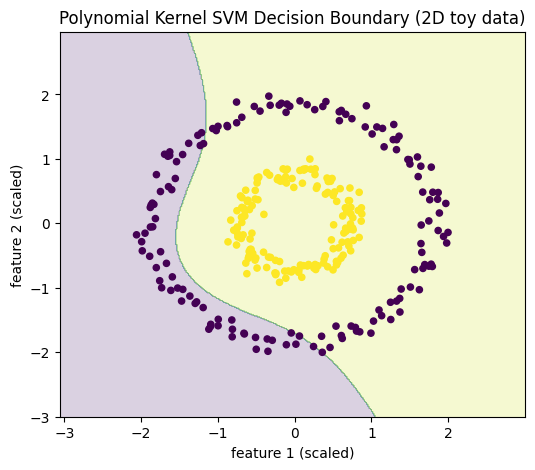

In [4]:
# 4) Train an SVM with Polynomial kernel and visualize decision boundary (2D toy data)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler

X2, y2 = make_circles(n_samples=300, factor=0.4, noise=0.05, random_state=1)
scaler2 = StandardScaler().fit(X2)
X2s = scaler2.transform(X2)

clf_poly = SVC(kernel='poly', degree=3, C=1.0).fit(X2s, y2)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X2s[:,0].min()-1, X2s[:,0].max()+1, 400),
                     np.linspace(X2s[:,1].min()-1, X2s[:,1].max()+1, 400))
Z = clf_poly.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X2s[:,0], X2s[:,1], c=y2, s=20)
plt.title('Polynomial Kernel SVM Decision Boundary (2D toy data)')
plt.xlabel('feature 1 (scaled)'); plt.ylabel('feature 2 (scaled)')
plt.show()

In [5]:
# 5) Train Gaussian Naive Bayes on the Breast Cancer dataset and evaluate accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
Xc, yc = data.data, data.target
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.25, random_state=42, stratify=yc)

gnb = GaussianNB().fit(Xc_train, yc_train)
y_predc = gnb.predict(Xc_test)
print('GaussianNB accuracy on breast cancer dataset:', accuracy_score(yc_test, y_predc))

GaussianNB accuracy on breast cancer dataset: 0.9370629370629371


In [6]:
# 6) Multinomial Naive Bayes on 20 Newsgroups (subset) for text classification
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']  # small subset to keep runtime reasonable
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers','footers','quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers','footers','quotes'))

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf.fit(newsgroups_train.data, newsgroups_train.target)
pred = text_clf.predict(newsgroups_test.data)
print('MultinomialNB accuracy (20newsgroups subset):', accuracy_score(newsgroups_test.target, pred))
print('\nClassification report:\n', classification_report(newsgroups_test.target, pred, target_names=newsgroups_test.target_names))

MultinomialNB accuracy (20newsgroups subset): 0.7117516629711752

Classification report:
                     precision    recall  f1-score   support

       alt.atheism       0.55      0.75      0.63       319
     comp.graphics       0.90      0.88      0.89       389
         sci.space       0.70      0.92      0.80       394
talk.religion.misc       0.78      0.07      0.13       251

          accuracy                           0.71      1353
         macro avg       0.73      0.66      0.61      1353
      weighted avg       0.74      0.71      0.66      1353



In [7]:
# 7) Feature scaling before training an SVM and compare results with unscaled data (Iris dataset)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

X_i, y_i = iris.data, iris.target
svc_unscaled = SVC(kernel='rbf', random_state=0)
svc_scaled = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', random_state=0))])

acc_unscaled = cross_val_score(svc_unscaled, X_i, y_i, cv=5).mean()
acc_scaled = cross_val_score(svc_scaled, X_i, y_i, cv=5).mean()
print('Cross-val accuracy unscaled:', acc_unscaled)
print('Cross-val accuracy scaled:', acc_scaled)

Cross-val accuracy unscaled: 0.9666666666666666
Cross-val accuracy scaled: 0.9666666666666666


In [8]:
# 8) GridSearchCV to tune SVM hyperparameters (C, gamma, kernel) on Wine dataset
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10], 'gamma':['scale','auto',0.1,1], 'kernel':['rbf','poly','linear']}
grid = GridSearchCV(SVC(), param_grid, cv=4, n_jobs=-1)
grid.fit(Xw_train, yw_train)
print('Best params:', grid.best_params_)
print('Best cross-val score:', grid.best_score_)
print('Test set score with best estimator:', grid.best_estimator_.score(Xw_test, yw_test))

Best params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-val score: 0.9596774193548387
Test set score with best estimator: 0.9444444444444444


In [9]:
# 9) Train SVM on an imbalanced dataset and apply class weighting
from sklearn.datasets import make_classification
Ximb, yimb = make_classification(n_samples=1000, n_features=20, n_informative=3, n_redundant=2,
                                 n_clusters_per_class=1, weights=[0.9,0.1], flip_y=0, random_state=42)
Ximb_train, Ximb_test, yimb_train, yimb_test = train_test_split(Ximb, yimb, test_size=0.3, random_state=42, stratify=yimb)

# Without class weights
svc_nowt = SVC(kernel='rbf', C=1.0, random_state=42).fit(Ximb_train, yimb_train)
acc_nowt = svc_nowt.score(Ximb_test, yimb_test)

# With class weights balanced
svc_wt = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42).fit(Ximb_train, yimb_train)
acc_wt = svc_wt.score(Ximb_test, yimb_test)

print('Imbalanced test accuracy without class_weight:', acc_nowt)
print('Imbalanced test accuracy with class_weight=balanced:', acc_wt)

Imbalanced test accuracy without class_weight: 0.9433333333333334
Imbalanced test accuracy with class_weight=balanced: 0.93


In [10]:
# 10) Bernoulli Naive Bayes example for binary features (toy data)
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer

docs = ['spam money win', 'hello friend', 'win prize money', 'meeting schedule', 'free money now', 'let us meet']
ysp = [1,0,1,0,1,0]  # 1 = spam, 0 = ham
cv = CountVectorizer(binary=True)
Xbin = cv.fit_transform(docs)
bnb = BernoulliNB(alpha=1.0).fit(Xbin, ysp)
print('Feature names:', cv.get_feature_names_out())
print('Predictions for training set:', bnb.predict(Xbin))

Feature names: ['free' 'friend' 'hello' 'let' 'meet' 'meeting' 'money' 'now' 'prize'
 'schedule' 'spam' 'us' 'win']
Predictions for training set: [1 0 1 0 1 0]


In [11]:
# 11) Compare SVM and Naive Bayes on the same dataset (Breast cancer)
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
svc_basic = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', random_state=0))])
print('GaussianNB CV accuracy:', cross_val_score(gnb, Xc, yc, cv=5).mean())
print('SVC (scaled) CV accuracy:', cross_val_score(svc_basic, Xc, yc, cv=5).mean())

GaussianNB CV accuracy: 0.9385188635305075
SVC (scaled) CV accuracy: 0.9736376339077782


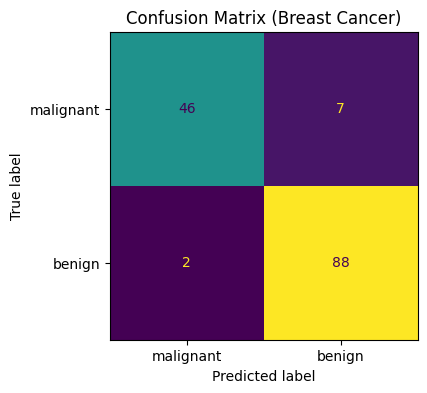

In [12]:
# 12) Confusion Matrix visualization using matplotlib (Breast cancer test predictions from earlier)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(yc_test, y_predc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax, cmap='viridis', colorbar=False)
plt.title('Confusion Matrix (Breast Cancer)')
plt.show()

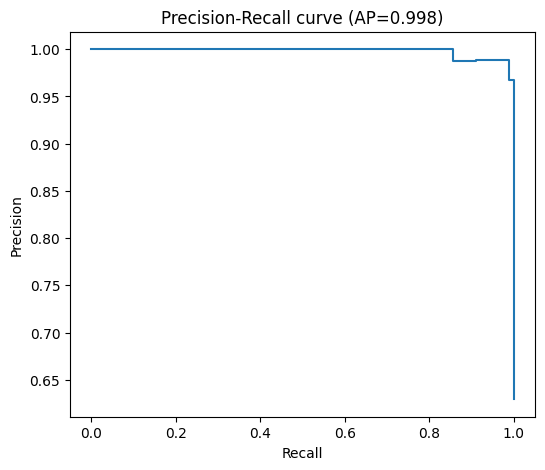

In [13]:
# 13) Precision-Recall curve visualization for SVM on binary problem (Breast Cancer)
from sklearn.metrics import precision_recall_curve, average_precision_score

svc_prob = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', probability=True, random_state=0))])
svc_prob.fit(Xc_train, yc_train)
probs = svc_prob.predict_proba(Xc_test)[:,1]
precision, recall, _ = precision_recall_curve(yc_test, probs)
ap = average_precision_score(yc_test, probs)

plt.figure(figsize=(6,5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AP={ap:.3f})')
plt.show()

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

docs = ['a b a', 'b b c', 'a c c', 'a a b', 'd e f', 'e f f']
y = [0,0,0,0,1,1]
cv = CountVectorizer(stop_words=None, token_pattern=r'\b\w+\b') # Modified token_pattern
X = cv.fit_transform(docs)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)

for alpha in [0.0, 0.5, 1.0]:
    mnb = MultinomialNB(alpha=alpha).fit(Xtr, ytr)
    print('alpha=', alpha, ' -> test accuracy:', mnb.score(Xte, yte))

ValueError: empty vocabulary; perhaps the documents only contain stop words

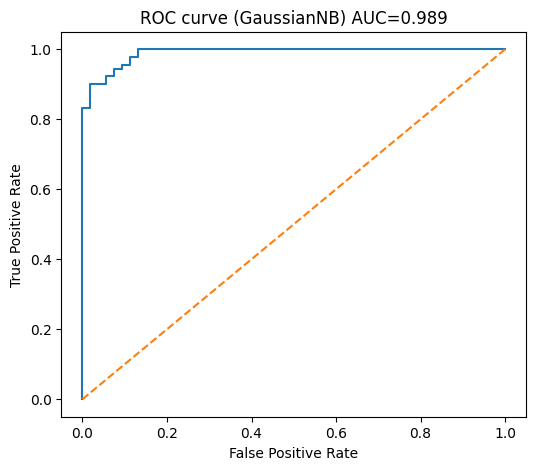

In [15]:
# 15) ROC-AUC for GaussianNB on Breast Cancer (probabilistic output)
from sklearn.metrics import roc_auc_score, roc_curve
gnb_proba = GaussianNB().fit(Xc_train, yc_train).predict_proba(Xc_test)[:,1]
roc_auc = roc_auc_score(yc_test, gnb_proba)
fpr, tpr, _ = roc_curve(yc_test, gnb_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (GaussianNB) AUC={roc_auc:.3f}')
plt.show()